In [86]:
import cmath as cm 
import math as m
import numpy as np
from matplotlib import pylab as plt
import scipy as sc 
from pylab import contour
from itertools import cycle

In [87]:
N = 0.3
gamma = 25*10**3
h = 2000
lambda1 = 0.5
T2 = gamma*h/10**6.
T1=lambda1*T2
p = 1
T2_1 = (T2-T1)/4
T21 = (T2+T1)/4
pT2 = (p-T2)/2
sigma1_crit = 6
t_max_crit = 30
print T1, T2, pT2

25.0 50.0 -24.5


$$ \sigma_1,_2 = 2Re(\frac{p+T_2}{2} (\frac{z}{\sqrt{z-a}\sqrt{z+a}}-1) + \frac{T_1+T_2}{2}) \pm \vert (z-\overline{z}) \frac{p+T_2}{2} \frac{a^2}{(z-a)^\frac{3}{2}(z+a)^\frac{3}{2}}+\frac{T_2-T_1}{2}\vert $$

In [88]:
def Phi(x,y,a):
    return ((p+T2)/2.)*((x+1j*y)/(np.sqrt(x+1j*y-a) * np.sqrt(x+1j*y+a))-1)+(T1+T2)/4.
def der_Phi(x,y,a):
    return ((p+T2)/2.)*(1/((np.sqrt(x+1j*y-a) * np.sqrt(x+1j*y+a))**3))

def sigma1(x,y,a):
    return 2*((pT2*(x+1j*y)/(np.sqrt(x+1j*y-a) * np.sqrt(x+1j*y+a))-1)+T21).real+abs(pT2*(2*1j*y)*a**2/(np.sqrt(x+1j*y-a) * np.sqrt(x+1j*y+a))**3+T2_1)
def sigma2(x,y,a):
    return 2*((pT2*(x+1j*y)/(np.sqrt(x+1j*y-a) * np.sqrt(x+1j*y+a))-1)+T21).real-abs(pT2*(2*1j*y)*a**2/(np.sqrt(x+1j*y-a) * np.sqrt(x+1j*y+a))**3+T2_1)
def t_max(x,y,z):
    return abs(pT2*(2*1j*y)*a**2/(np.sqrt(x+1j*y-a) * np.sqrt(x+1j*y+a))**3+T2_1)

C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in cdouble_scalars
  import sys
C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in cdouble_scalars
  import sys
C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in cdouble_scalars
  # This is added back by InteractiveShellApp.init_path()


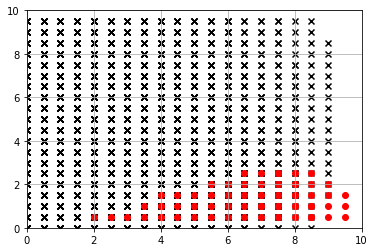

In [89]:
x = np.arange(0,10,0.5)
y = np.arange(0,10,0.5)
#z_sigma = np.zeros((100,100))
#z_tmax = np.zeros((100,100))
#x_len = len(x)-1
#kx = range (0, len(x)) 
#ky = range (0, len(y)) 
X, Y = np.meshgrid(x, y)

for a in range(10): 
     for i in x:
        for j in y: 
            if sigma1(i,j,a)>sigma1_crit:
                plt.scatter(x=i, y=j,marker = 'x', color = 'black')
for a in range(10): 
     for i in x:
        for j in y: 
            if t_max(i,j,a)>t_max_crit:
                plt.scatter(x=i, y=j, color = 'red')

plt.xlim(0,10)
plt.ylim(0,10)
plt.grid(True)
plt.savefig('destr')
plt.show()

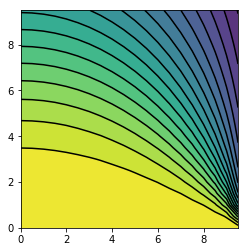

In [90]:
Zsg1=sigma1(X,Y,10)
plt.contourf(X, Y, Zsg1,16, alpha=0.9);
plt.contour(X, Y, Zsg1,16, colors='black', linewidth=.5);
plt.gcf().set_facecolor('w');
plt.gcf().gca().axis('image');
plt.show()